<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Snack-O-Meter: a tool to inform consumers on consumption of biscuits

# Content Page

1. [Webscraping for data](01_webscraping.ipynb)
2. [Data cleaning](02_cleaning.ipynb)
3. [EDA](03_eda.ipynb)
4. [Data Modelling](04_modelling.ipynb)

## Data Dictionary

|Feature|Type|Description|
|---|---|:---|
|**type**|*string*|Subcategory of Biscuit<br>cookie: chocolate cookie<br>cracker<br>cream: creamed & filled biscuit<br>wafers|
|**product**|*string*|Name of product|
|**per_serving_g**|*int64*|Size of serving per one gram (gram)|
|**total_fat_g_per_gram_of_serving**|*int64*|Total fats per gram of serving (gram)|
|**sugars_g_per_gram_of_serving**|*int64*|Sugars per gram of serving (gram)|
|**sodium_g_per_gram_of_serving**|*int64*|Sodium per gram of serving (gram)|

## EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set the display option to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [5]:
df_final = pd.read_csv('../data/final_df.csv')
df_final.sample(10)

,type,product,per_serving_g,total_fat_g,sugars_g,sodium_g,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
44,cream,Cowhead Sandwich Crackers with Calcium - Cheese,24.0,6.0,4.0,0.140,0.250000,0.166667,0.005833
58,cream,Lotus Biscoff Biscuits - Milk Chocolate,100.0,24.0,40.0,0.325,0.240000,0.400000,0.003250
47,cream,Jack 'n Jill Dewberry Sandwich Biscuits - Strawberry,36.0,7.9,12.0,0.100,0.219444,0.333333,0.002778
1,cookie,Beryl's Coconut Sable with Macadamia Nuts,25.0,9.9,5.1,0.000,0.396000,0.204000,0.000000
87,wafer,Kagi Swiss Chocolate Wafer Minis - Dark,125.0,37.0,34.0,0.056,0.296000,0.272000,0.000448
84,wafer,Kagi Swiss Chocolate Wafer Minis - Classic,100.0,35.0,38.0,0.096,0.350000,0.380000,0.000960
32,cracker,Julie's Crackers - Wheat,25.0,8.0,1.0,0.160,0.320000,0.040000,0.006400
23,cracker,Julie's Veggie Crackers,23.0,6.0,1.0,0.140,0.260870,0.043478,0.006087
29,cracker,FairPrice Cream Crackers,100.0,21.5,1.6,0.367,0.215000,0.016000,0.003670
14,cookie,Munchy's Oat Krunch - Dark Chocolate,26.0,5.0,7.0,0.050,0.192308,0.269231,0.001923


In [4]:
df_final.describe()

,per_serving_g,total_fat_g,sugars_g,sodium_g,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,58.551136,13.182955,12.968182,0.146715,0.235590,0.230701,0.003191
std,52.730830,9.852069,12.142729,0.117531,0.066612,0.121566,0.001977
min,12.000000,0.500000,0.000000,0.000000,0.041667,0.000000,0.000000
25%,25.000000,6.000000,4.000000,0.069500,0.200000,0.147250,0.001862
50%,30.000000,8.000000,7.800000,0.106500,0.240588,0.252389,0.003225
75%,100.000000,23.075000,21.275000,0.184750,0.269423,0.325353,0.004465
max,400.000000,37.000000,51.000000,0.510000,0.405000,0.510000,0.008269


### Fats

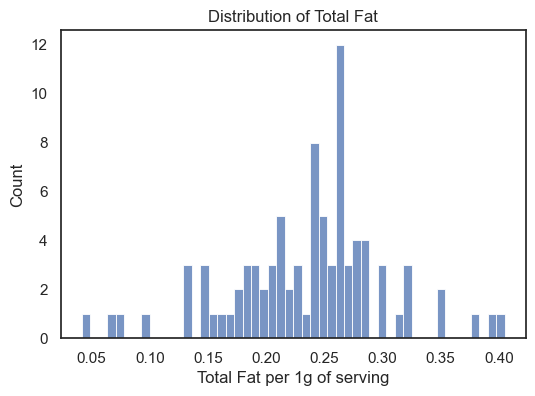

In [5]:
# Set the figure style and size
sns.set(style="white")
plt.figure(figsize=(6,4))

# Create the histogram
sns.histplot(data=df_final,x="total_fat_g_per_gram_of_serving", bins=50)

# Add labels and titles
plt.xlabel('Total Fat per 1g of serving')
plt.ylabel('Count')
plt.title("Distribution of Total Fat")

# Show the plot
plt.show()

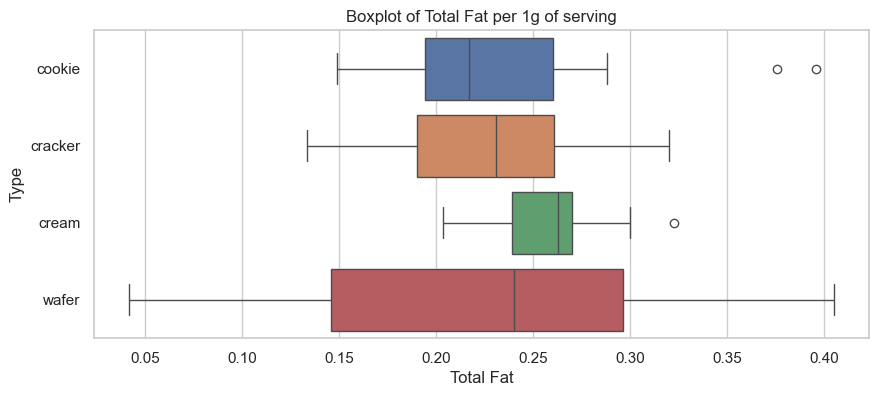

In [6]:
# Set the figure style and size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))

# Plot separate boxplots for each type
sns.boxplot(data=df_final, x='total_fat_g_per_gram_of_serving', y='type', orient='h', hue='type')

# Set titles and labels of the plot
plt.title('Boxplot of Total Fat per 1g of serving')
plt.ylabel('Type')
plt.xlabel('Total Fat')

# Show the plot
plt.show()

In [7]:
# check if values for outliers are correct

df_final[(df_final['total_fat_g_per_gram_of_serving'] > 0.30) & ((df_final['type'] == 'cookie') | (df_final['type'] == 'cream'))]

,type,product,per_serving_g,total_fat_g,sugars_g,sodium_g,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
1,cookie,Beryl's Coconut Sable with Macadamia Nuts,25.0,9.9,5.1,0.000,0.396000,0.204000,0.000000
3,cookie,Beryl's Strawberry Sable,25.0,9.4,4.8,0.000,0.376000,0.192000,0.000000
56,cream,Khong Guan Sandwich Biscuits - Orange,31.0,10.0,8.0,0.085,0.322581,0.258065,0.002742


Values are cross checked with the brand's official site or Fairprice website and verified to be correct. Hence, will not be removed for subsequent modelling.
- https://www.berylschocolate.com.my/beryl-s-coconut-sable-with-macadamia-nut-95g-pack-of-2
- https://www.berylschocolate.com.my/beryl-s-strawberry-sable-95g
- https://www.fairprice.com.sg/product/khong-guan-orange-cream-biscuits-200g-278938

Based on the median values, chocolate cookie has the lowest fat per 1g of serving, followed by cracker, then wafer, and cream biscuit has the highest fat. This could be due to the cream filling contributing to additional amount of fats on top of the butter that is a common ingredient in biscuit.

### Sugar

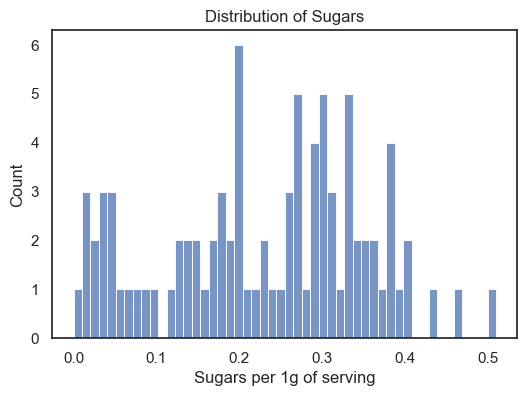

In [8]:
# Set the figure style and size
sns.set_style("white")
plt.figure(figsize=(6,4))

# Create the histogram
sns.histplot(data=df_final,x="sugars_g_per_gram_of_serving", bins=50)

# Add labels and titles
plt.xlabel('Sugars per 1g of serving')
plt.ylabel('Count')
plt.title("Distribution of Sugars")

# Show the plot
plt.show()

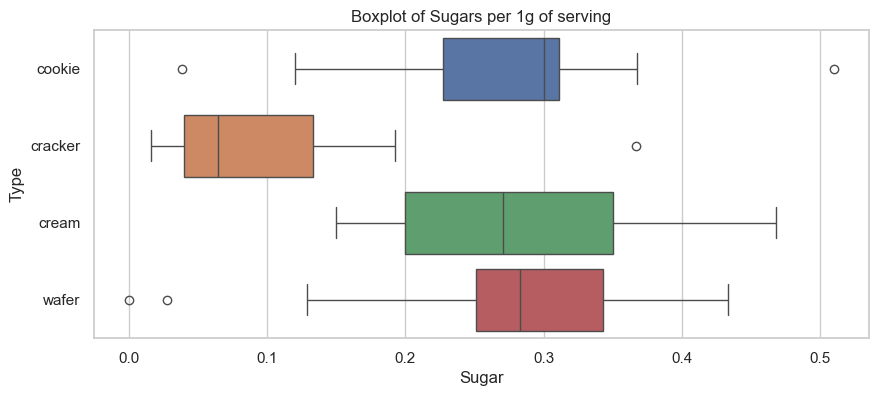

In [9]:
# Set the figure style and size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))

# Plot separate boxplots for each type
sns.boxplot(data=df_final, x='sugars_g_per_gram_of_serving', y='type', orient='h',hue='type')

# Set titles and labels of the plot
plt.title('Boxplot of Sugars per 1g of serving')
plt.ylabel('Type')
plt.xlabel('Sugar')

# Show the plot
plt.show()

In [10]:
# check if values for outliers are correct

df_final[df_final['sugars_g_per_gram_of_serving'] > 0.5]

,type,product,per_serving_g,total_fat_g,sugars_g,sodium_g,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
8,cookie,Jules Destrooper Biscuits - Belgian Chocolate Thins,100.0,25.0,51.0,0.24,0.25,0.51,0.0024


In [11]:
df_final[(df_final['sugars_g_per_gram_of_serving'] > 0.30) & (df_final['type'] == 'cracker')]

,type,product,per_serving_g,total_fat_g,sugars_g,sodium_g,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
37,cracker,Khong Guan Biscuits - Sultana,30.0,4.0,11.0,0.085,0.133333,0.366667,0.002833


In [12]:
df_final[(df_final['sugars_g_per_gram_of_serving'] < 0.10) & ((df_final['type'] == 'cookie') | (df_final['type'] == 'wafer'))]

,type,product,per_serving_g,total_fat_g,sugars_g,sodium_g,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
7,cookie,FUEL10K Double Chocolate High Protein Oat Cookie,100.0,14.9,3.8,0.280,0.149,0.03800,0.002800
69,wafer,Alor Durian Wafer 21g x 10,100.0,31.1,0.0,0.061,0.311,0.00000,0.000610
76,wafer,Mincher Peanut Flavor Wafer,400.0,29.2,10.9,0.071,0.073,0.02725,0.000177


Values are cross checked with Fairprice website to ensure webscraping is done correctly. Hence, will not be removed for subsequent modelling.

https://www.fairprice.com.sg/product/jules-destrooper-biscuits-belgian-chocolate-thins-100g-11093580
<br>https://www.fairprice.com.sg/product/khong-guan-biscuits-sultana-260g-11031742
<br>https://www.fairprice.com.sg/product/fuel10k-double-chocolate-high-protein-oat-cookie-50-g-90158283
<br>https://www.fairprice.com.sg/product/alor-durian-wafer-21g-x-10-210-g-90152342
<br>https://www.fairprice.com.sg/product/mincher-peanut-flavor-wafer-400-g-90164289

Based on the median values, cracker has the lowest sugar per 1g of serving, followed by cream biscuit, then wafer, and chocolate cookie has the highest sugar. This could be due to the chocolate contributing to additional amount of sugar on top of the sugar that is a common ingredient in biscuit.

### Sodium

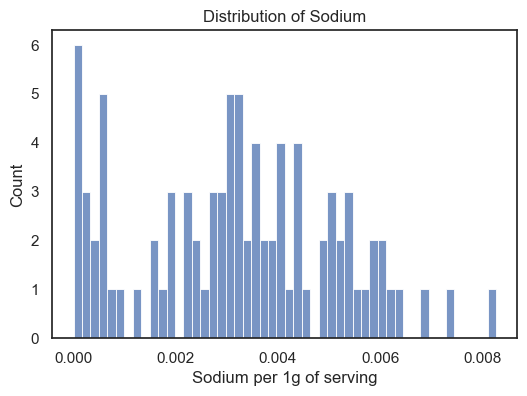

In [13]:
# Set the figure style and size
sns.set_style("white")
plt.figure(figsize=(6,4))

# Create the histogram
sns.histplot(data=df_final,x="sodium_g_per_gram_of_serving", bins=50)

# Add labels and titles
plt.xlabel('Sodium per 1g of serving')
plt.ylabel('Count')
plt.title("Distribution of Sodium")

# Show the plot
plt.show()

Based on the distribution, it seems that there are quite a few product without sodium. 

In [14]:
df_final[df_final['sodium_g_per_gram_of_serving'] == 0]

,type,product,per_serving_g,total_fat_g,sugars_g,sodium_g,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
0,cookie,Beryl's Chocolate Orange Cashew Nuts Cookies,25.0,4.6,7.6,0.0,0.184,0.304,0.0
1,cookie,Beryl's Coconut Sable with Macadamia Nuts,25.0,9.9,5.1,0.0,0.396,0.204,0.0
2,cookie,Beryl's Cookies Chocolate Sable,25.0,7.2,9.2,0.0,0.288,0.368,0.0
3,cookie,Beryl's Strawberry Sable,25.0,9.4,4.8,0.0,0.376,0.192,0.0
4,cookie,Beryl's Cookies Exquisite Selection (Tin),25.0,4.0,5.0,0.0,0.160,0.200,0.0
81,wafer,Aladdin Danish Deluxe Waffle Cones,100.0,6.9,28.6,0.0,0.069,0.286,0.0


Most of the products without sodium are chocolate cookies from Beryl's. Upon cross checking with the official webpage [https://www.berylschocolate.com.my/], there is indeed no sodium reported in the nutrition information. Although salt is one of the ingredient, salt is also not reported in the nutrition information. This could be due to very minimal amount of salt being used. This data will not be removed from the modeling to simulate the actual situation where nutrition information may not be reported. 

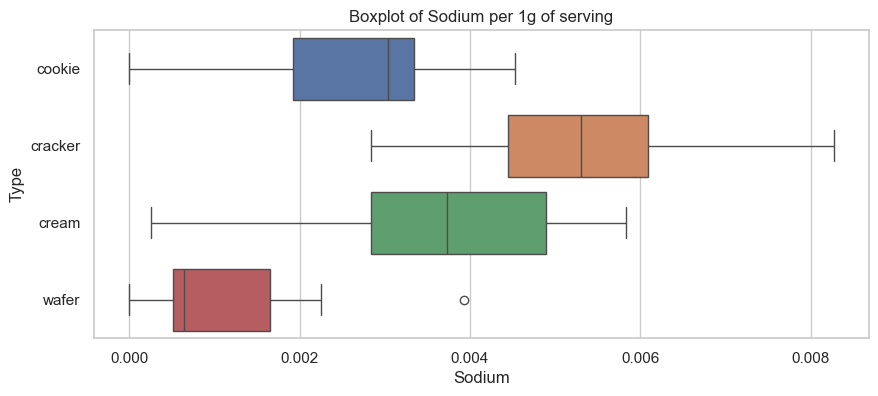

In [15]:
# Set the figure style and size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))

# Plot separate boxplots for each type
sns.boxplot(data=df_final, x='sodium_g_per_gram_of_serving', y='type', orient='h', hue='type')

# Set titles and labels of the plot
plt.title('Boxplot of Sodium per 1g of serving')
plt.ylabel('Type')
plt.xlabel('Sodium')

# Show the plot
plt.show()

In [16]:
# check if values for outliers are correct

df_final[(df_final['sodium_g_per_gram_of_serving'] > 0.003) & (df_final['type'] == 'wafer')]

,type,product,per_serving_g,total_fat_g,sugars_g,sodium_g,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
79,wafer,Lee Biscuits Carton - 24 Pack Cheese Cream Wafers Cubes,80.0,32.4,12.8,0.314,0.405,0.16,0.003925


Values are cross checked with Fairprice website to ensure webscraping is done correctly. Hence, will not be removed for subsequent modelling.

https://www.fairprice.com.sg/product/lee-biscuits-carton-24-pack-cheese-cream-wafers-cubes-24-x-80g-90022798

Based on the median values, wafer has the lowest sodium per 1g of serving, followed by chocolate cookie, then cream biscuit, and cracker has the highest sodium. Crackers are known to be savory biscuits compared to the other types of biscuit, and this could be explained by the high level of salt present in crackers.

### Overall findings from EDA

The level of fat, sugar and sodium varies within each biscuit type, as well as among different biscuit type. It will be challenging to inform consumers on whether a biscuit is healthy or not based on just its type. Hence, the project seeks to classify if a biscuit is healthy or not based on the 3 nutrients using a rule based approach. 

[Click for modelling](04_modelling.ipynb)